In [1]:
#Importing libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data 

df = pd.read_csv("day.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Checking shape 

df.shape

(730, 16)

In [4]:
#Checking summary 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [111]:
#Checking for null values

df.isnull().sum()

yr               0
holiday          0
workingday       0
temp             0
hum              0
windspeed        0
cnt              0
Aug              0
Dec              0
Feb              0
Jan              0
July             0
June             0
Mar              0
May              0
Nov              0
Oct              0
Sep              0
Mon              0
Sat              0
Sun              0
Thu              0
Tue              0
Wed              0
Mist + Cloudy    0
Light Snow       0
summer           0
fall             0
winter           0
dtype: int64

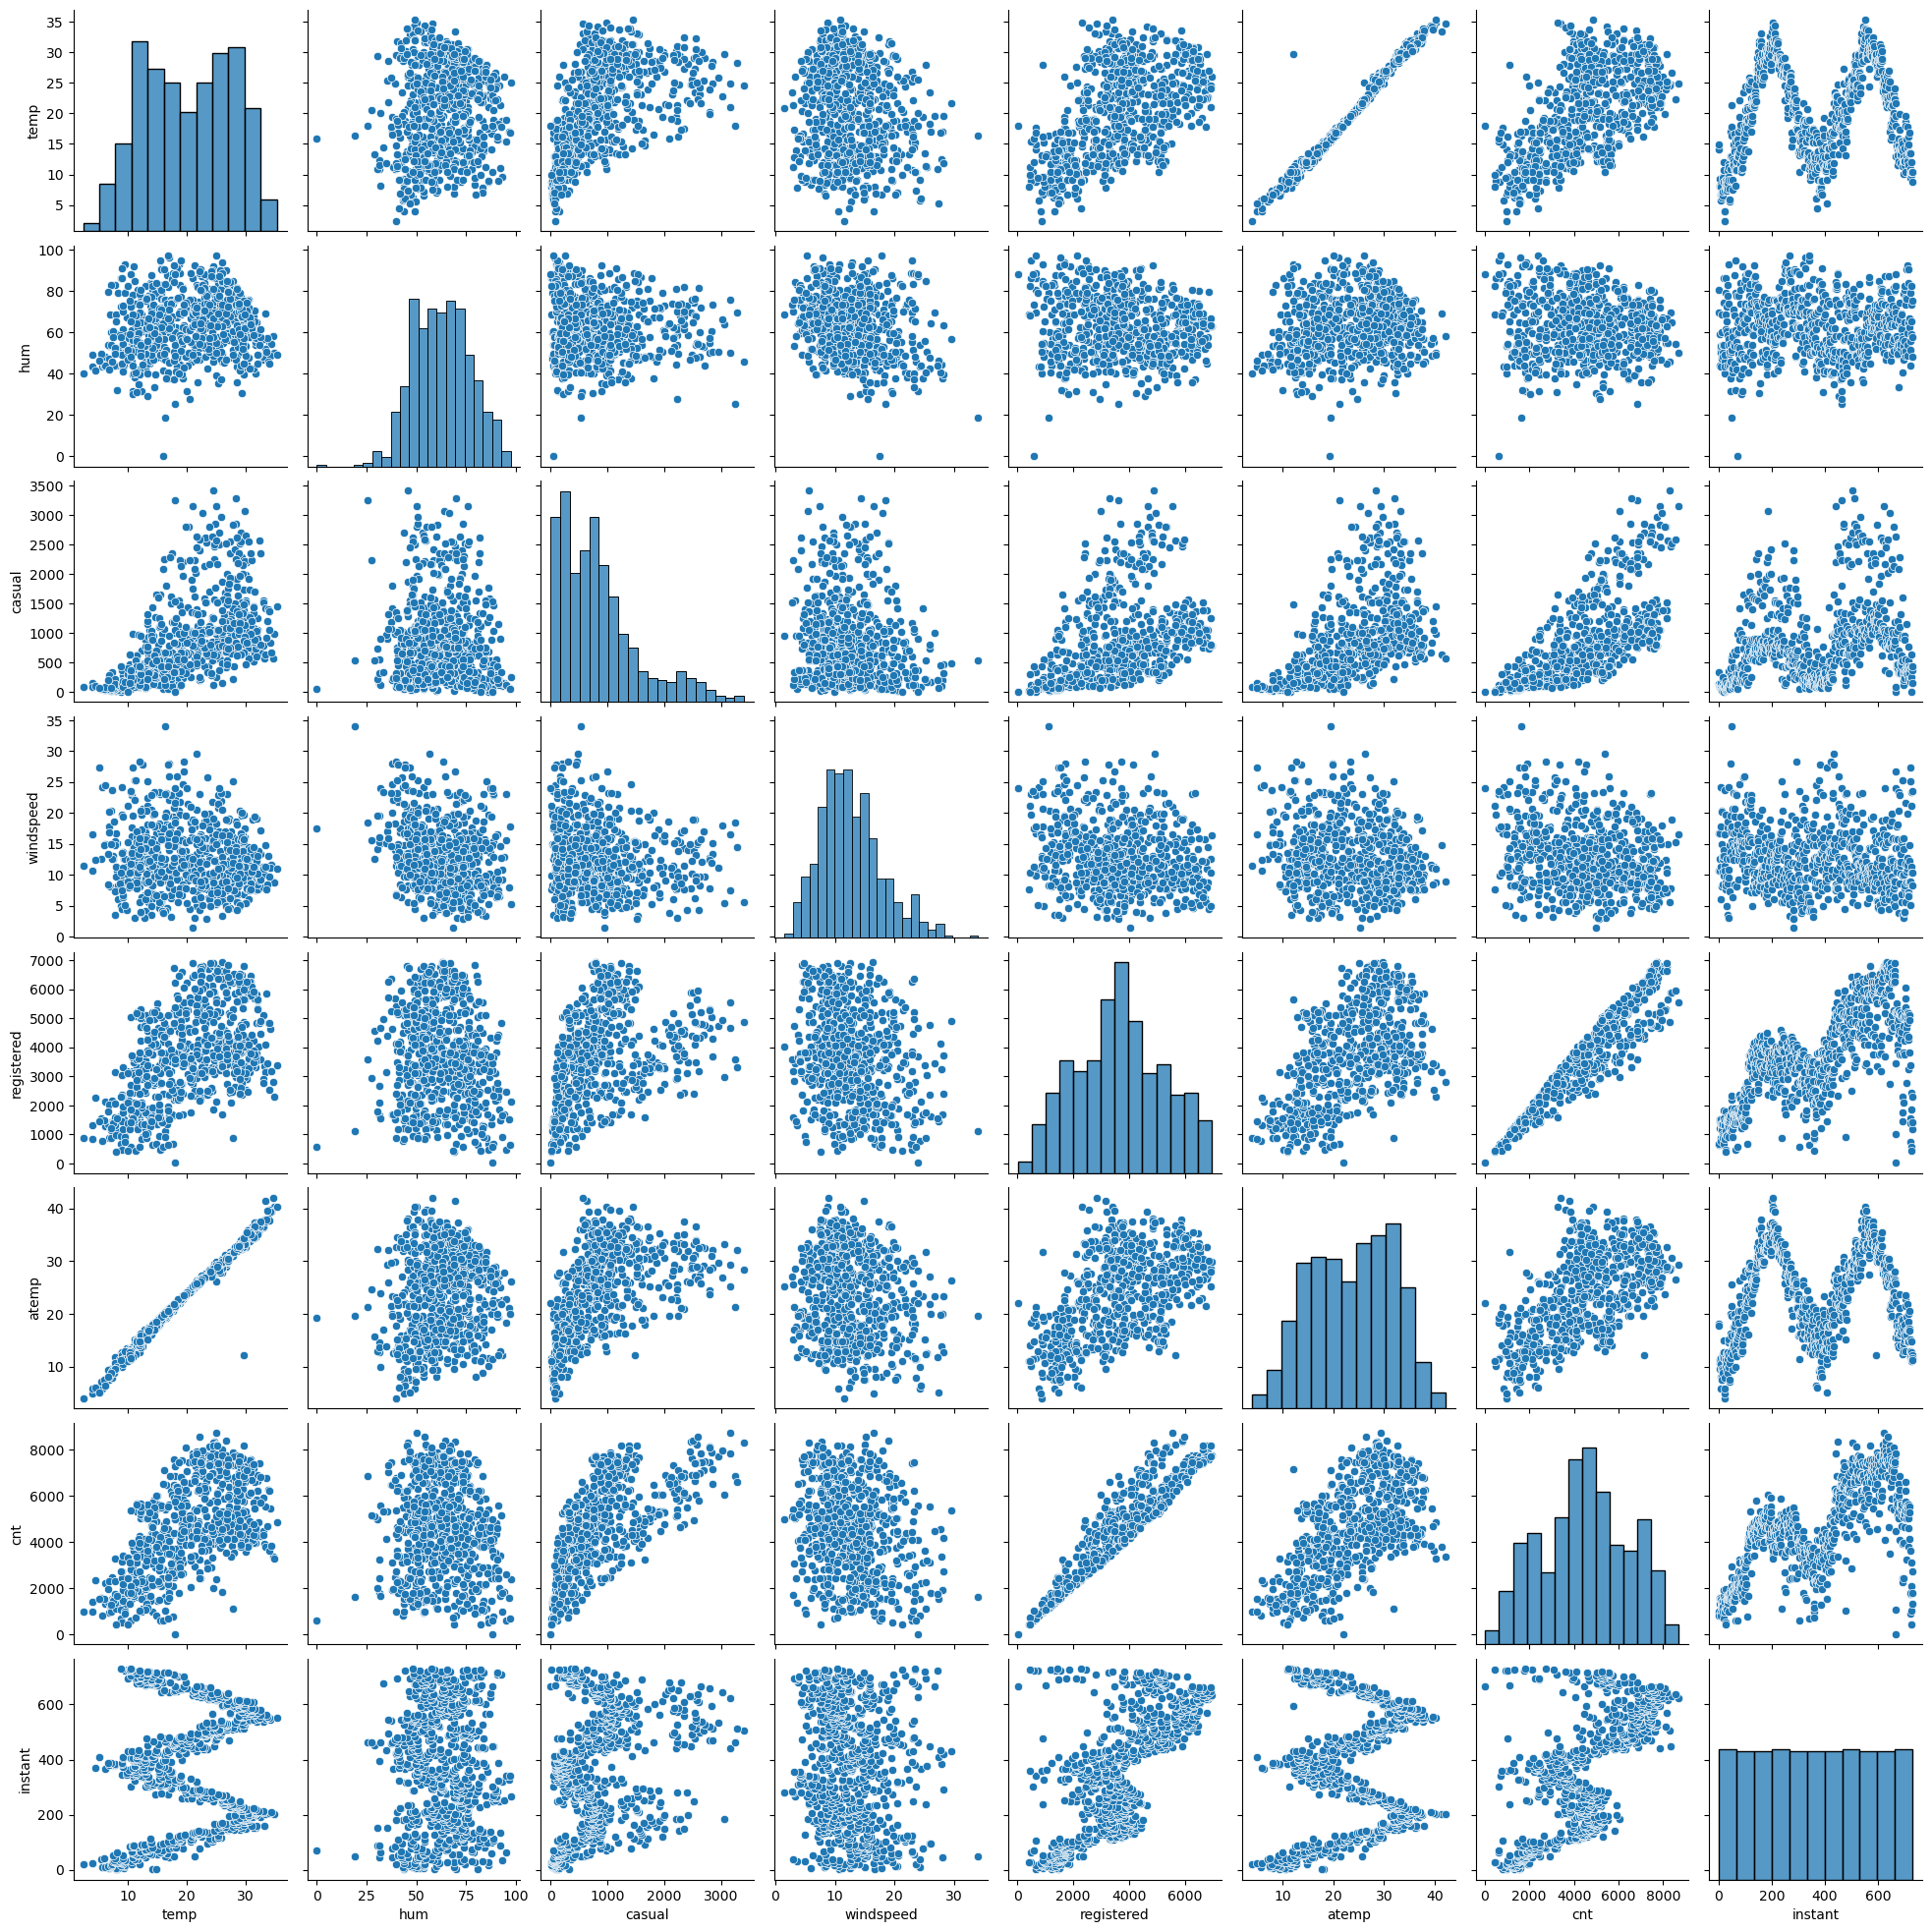

In [6]:
#Visualising numerical columns 

num_cols = ["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant']
sns.pairplot(df , vars=num_cols)
plt.show()

In [7]:
#Changing "weathersit" and "season"

df = df.astype({'weathersit': 'category', 'season': 'category'})
print(df.dtypes)

instant          int64
dteday          object
season        category
yr               int64
mnth             int64
holiday          int64
weekday          int64
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


In [8]:
#Mapping categorical variables with their subcategories to help with visualization analysis 

df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


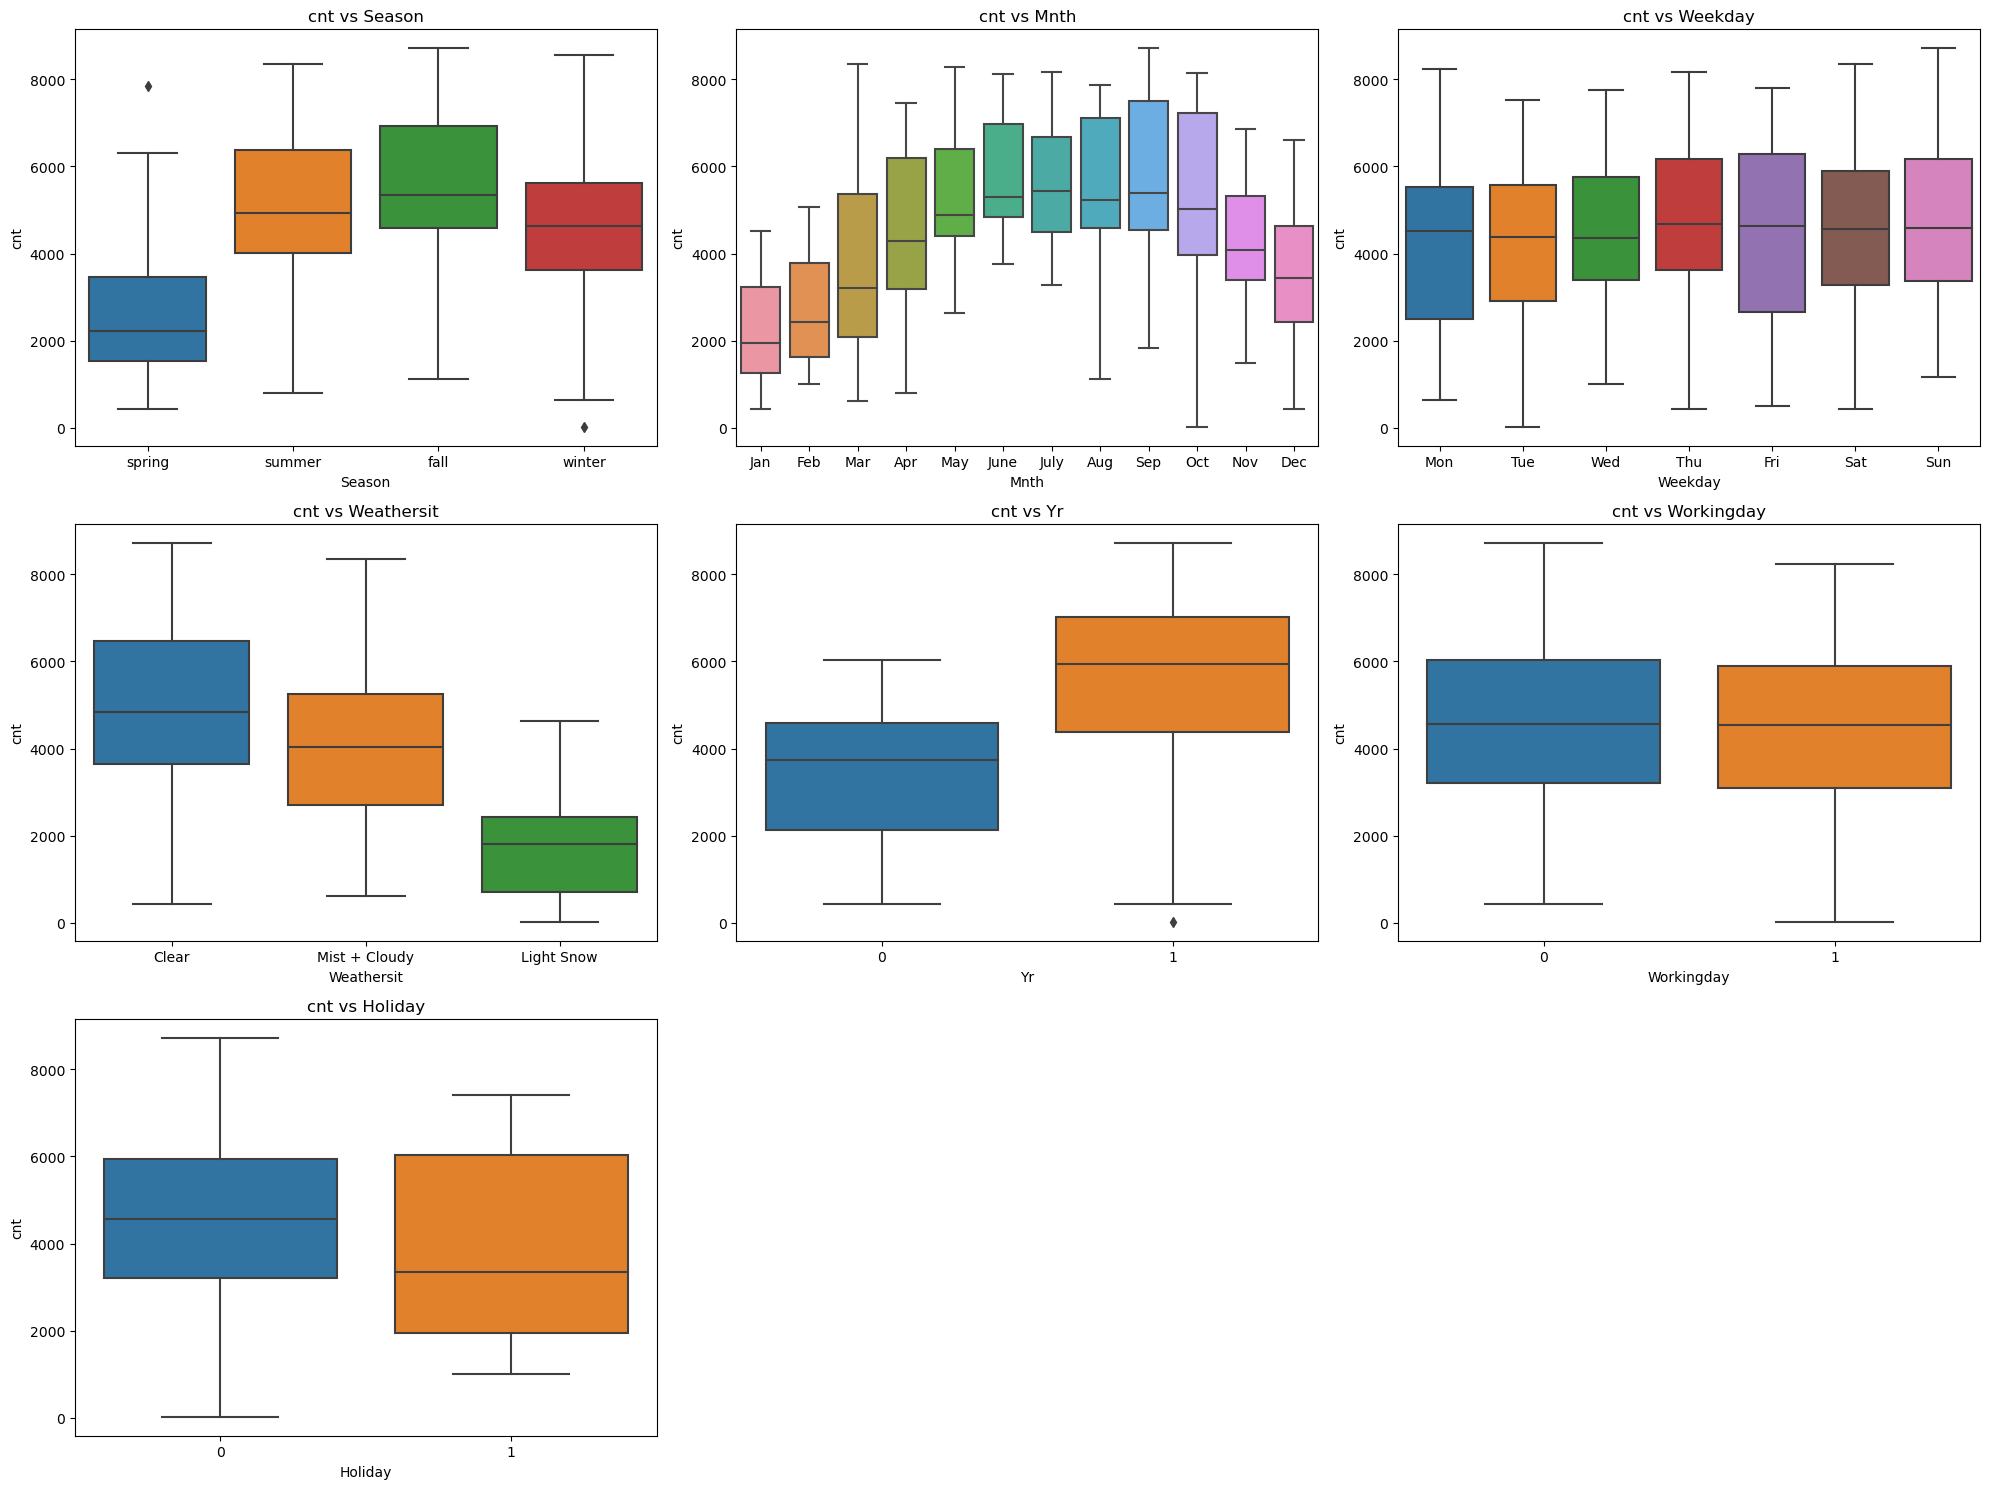

In [9]:
#Visualising categorical columns 

cat_cols = ['season', 'mnth', 'weekday' , 'weathersit' , 'yr' , 'workingday', 'holiday' ]

plt.figure(figsize=(20, 15))

# Loop through each categorical column
for i, col in enumerate(cat_cols, start=1):
    plt.subplot(3, 3, i) 
    sns.boxplot(x=col, y="cnt", data=df) 
    plt.title(f"cnt vs {col.capitalize()}") 
    plt.xlabel(col.capitalize())
    plt.ylabel("cnt")  

plt.tight_layout()  
plt.show()

In [10]:
#Dropping unecessary variables 

df = df.drop(['atemp', 'instant', "dteday",'casual', 'registered'], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [11]:
#Checking number of variables left along w their data types 

df.dtypes

season        category
yr               int64
mnth            object
holiday          int64
weekday         object
workingday       int64
weathersit    category
temp           float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [12]:
#Creating dummy variables for categorical and object columns 

month = pd.get_dummies(df.mnth, drop_first=True , dtype=int)
weekday = pd.get_dummies(df.weekday, drop_first=True , dtype=int)
weathersit = pd.get_dummies(df.weathersit, drop_first=True , dtype=int)
season = pd.get_dummies(df.season, drop_first=True , dtype=int)

In [13]:
#Concating the dummy variables with original df 

df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,1,0,1,0,0,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it

df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,8.378268,51.8261,6.000868,1606,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,8.057402,49.8696,11.304642,1510,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7,0,0,1,6.765000,53.5833,17.875868,959,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,1,5.671653,43.4167,24.250650,822,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
#Checking the shape, info of the dataset and also checking the correlation of variables in a heatmap 

df.shape

(730, 29)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    int32  
 8   Dec            730 non-null    int32  
 9   Feb            730 non-null    int32  
 10  Jan            730 non-null    int32  
 11  July           730 non-null    int32  
 12  June           730 non-null    int32  
 13  Mar            730 non-null    int32  
 14  May            730 non-null    int32  
 15  Nov            730 non-null    int32  
 16  Oct            730 non-null    int32  
 17  Sep            730 non-null    int32  
 18  Mon       

In [17]:
#Splitting into train and test set 

df_train, df_test = train_test_split(df, train_size=0.7, random_state =100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [18]:
#Rescaling numerical variables 

#represent the object 
scaler = MinMaxScaler()

#creating a list of num variables 
num_vars = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Mist + Cloudy', 'Light Snow',
       'summer', 'fall', 'winter']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.827658,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.465255,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
728,1.0,0.0,1.0,0.245101,0.498067,0.663106,0.204096,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.482973,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
111,0.0,0.0,0.0,0.345824,0.751824,0.380981,0.191095,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


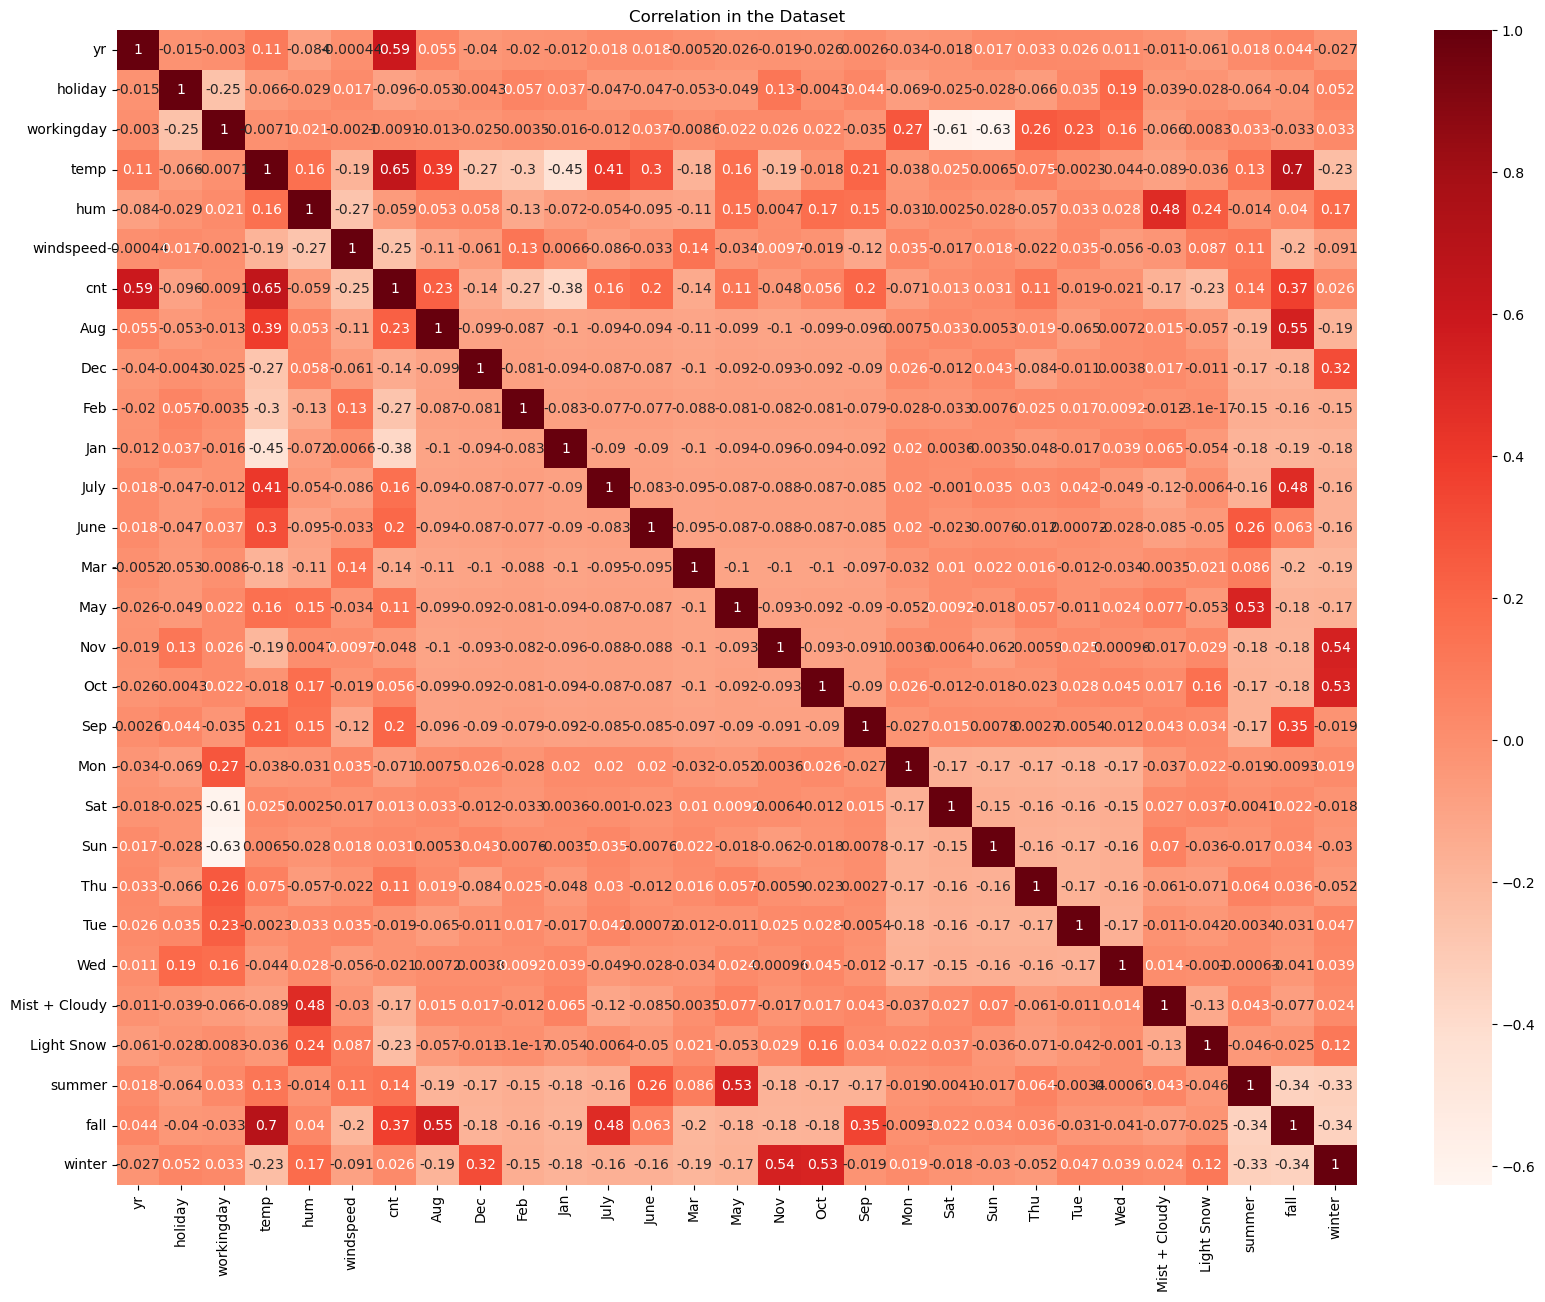

In [19]:
#Heatmap to check cnt column correlation w other variables  

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr() , annot=True , cmap = "Reds")
plt.title('Correlation in the Dataset')
plt.show()

In [20]:
#Creating X and y train

y_train = df_train.pop("cnt")
X_train = df_train

In [21]:
#adding constant
X_train_sm = sm.add_constant(X_train["yr"])

#create first model with area 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.3
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.95e-49
Time:                        15:25:40   Log-Likelihood:                 148.67
No. Observations:                 510   AIC:                            -293.3
Df Residuals:                     508   BIC:                            -284.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.011     33.131      0.000       0.356       0.401
yr             0.2652      0.016     16.531      0.000       0.234       0.297
==============================================================================
Omnibus:                       27.322   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.203
Skew:                          -0.560   Prob(JB):                     4.56e-07
Kurtosis:                       2.654   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Adding a constant to the predictors
X_train_sm = sm.add_constant(X_train)

#Creating model w all variables combined 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          1.34e-178
Time:                        15:25:51   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3508      0.084      4.190      0.000       0.186       0.515
yr                0.2311      0.008     28.384      0.000       0.215       0.247
holiday          -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday       -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp              0.4405      0.047      9.412      0.000       0.349       0.532
hum              -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed        -0.1825      0.026     -7.003      0.000      -0.234      -0.131
Aug               0.0273      0.034      0.806      0.421      -0.039       0.094
Dec              -0.0444      0.034     -1.309      0.191      -0.111       0.022
Feb              -0.0374      0.033     -1.123      0.262      -0.103       0.028
Jan              -0.0642      0.034     -1.894      0.059      -0.131       0.002
July             -0.0285      0.035     -0.808      0.420      -0.098       0.041
June              0.0084      0.025      0.336      0.737      -0.041       0.058
Mar               0.0008      0.025      0.032      0.974      -0.048       0.050
May               0.0247      0.021      1.164      0.245      -0.017       0.066
Nov              -0.0396      0.037     -1.077      0.282      -0.112       0.033
Oct               0.0056      0.036      0.156      0.876      -0.066       0.077
Sep               0.0908      0.032      2.822      0.005       0.028       0.154
Mon              -0.0246      0.015     -1.687      0.092      -0.053       0.004
Sat              -0.0557      0.072     -0.777      0.437      -0.197       0.085
Sun              -0.0495      0.072     -0.691      0.490      -0.190       0.091
Thu               0.0042      0.015      0.282      0.778      -0.025       0.034
Tue              -0.0261      0.015     -1.774      0.077      -0.055       0.003
Wed              -0.0102      0.015     -0.669      0.504      -0.040       0.020
Mist + Cloudy    -0.0578      0.011     -5.495      0.000      -0.079      -0.037
Light Snow       -0.2499      0.027     -9.380      0.000      -0.302      -0.198
summer            0.0868      0.024      3.641      0.000       0.040       0.134
fall              0.0404      0.030      1.335      0.182      -0.019       0.100
winter            0.1530      0.026      5.828      0.000       0.101       0.205
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.6
================================================================

In [23]:
#We will drop the non required columns based on their P value and Variance Inflation factor or VIF 

#1. P value should be less than 0.05 (use summary table)
#2. VIF factor should be less than 5 (write code)

In [24]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns 
vif["VIF"] = [variance_inflation_factor (X_train.values , i) for i in range (X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,workingday,59.78
3,temp,44.78
4,hum,40.88
26,fall,15.08
19,Sun,11.57
18,Sat,10.90
27,winter,10.86
25,summer,8.33
14,Nov,7.17
6,Aug,7.04


In [25]:
#Dropping Mar as it has high p value 

X = X_train_sm.drop("Mar" , axis = 1)

In [26]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          1.32e-179
Time:                        15:27:03   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     482   BIC:                            -871.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3516      0.080      4.410      0.000       0.195       0.508
yr                0.2311      0.008     28.414      0.000       0.215       0.247
holiday          -0.1348      0.065     -2.061      0.040      -0.263      -0.006
workingday       -0.0600      0.071     -0.845      0.399      -0.200       0.080
temp              0.4403      0.046      9.550      0.000       0.350       0.531
hum              -0.1573      0.039     -4.057      0.000      -0.233      -0.081
windspeed        -0.1825      0.026     -7.020      0.000      -0.234      -0.131
Aug               0.0269      0.032      0.843      0.399      -0.036       0.090
Dec              -0.0451      0.026     -1.718      0.086      -0.097       0.006
Feb              -0.0382      0.022     -1.699      0.090      -0.082       0.006
Jan              -0.0650      0.023     -2.883      0.004      -0.109      -0.021
July             -0.0288      0.034     -0.858      0.391      -0.095       0.037
June              0.0081      0.024      0.344      0.731      -0.038       0.055
May               0.0245      0.020      1.233      0.218      -0.015       0.064
Nov              -0.0402      0.031     -1.293      0.197      -0.101       0.021
Oct               0.0050      0.031      0.162      0.871      -0.056       0.066
Sep               0.0904      0.029      3.092      0.002       0.033       0.148
Mon              -0.0246      0.015     -1.692      0.091      -0.053       0.004
Sat              -0.0557      0.072     -0.778      0.437      -0.196       0.085
Sun              -0.0494      0.072     -0.691      0.490      -0.190       0.091
Thu               0.0042      0.015      0.283      0.778      -0.025       0.034
Tue              -0.0261      0.015     -1.778      0.076      -0.055       0.003
Wed              -0.0102      0.015     -0.671      0.503      -0.040       0.020
Mist + Cloudy    -0.0579      0.011     -5.502      0.000      -0.079      -0.037
Light Snow       -0.2499      0.027     -9.390      0.000      -0.302      -0.198
summer            0.0864      0.019      4.625      0.000       0.050       0.123
fall              0.0401      0.029      1.401      0.162      -0.016       0.096
winter            0.1529      0.026      5.916      0.000       0.102       0.204
==============================================================================
Omnibus:                       78.028   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.533
Skew:                          -0.762   Prob(JB):                     2.34e-45
Kurtosis:                       5.711   Cond. No.                         70.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [27]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features     VIF
0           const  406.82
3      workingday   66.31
19            Sun   38.78
18            Sat   36.99
26           fall   10.15
27         winter    7.95
4            temp    6.93
2         holiday    6.80
7             Aug    5.67
11           July    5.11
14            Nov    4.87
15            Oct    4.74
25         summer    4.15
16            Sep    4.04
8             Dec    3.40
10            Jan    2.62
12           June    2.53
5             hum    2.04
9             Feb    2.01
13            May    1.95
21            Tue    1.79
17            Mon    1.78
20            Thu    1.76
22            Wed    1.74
23  Mist + Cloudy    1.60
24     Light Snow    1.29
6       windspeed    1.25
1              yr    1.06


In [28]:
#Dropping workingday as it has high VIF value

X = X_train_sm.drop("workingday" , axis = 1)

In [29]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          1.81e-180
Time:                        15:27:42   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     483   BIC:                            -876.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2907      0.034      8.560      0.000       0.224       0.357
yr                0.2315      0.008     28.522      0.000       0.216       0.247
holiday          -0.0842      0.026     -3.205      0.001      -0.136      -0.033
temp              0.4419      0.046      9.595      0.000       0.351       0.532
hum              -0.1565      0.039     -4.039      0.000      -0.233      -0.080
windspeed        -0.1832      0.026     -7.050      0.000      -0.234      -0.132
Aug               0.0263      0.032      0.823      0.411      -0.036       0.089
Dec              -0.0442      0.026     -1.687      0.092      -0.096       0.007
Feb              -0.0376      0.022     -1.672      0.095      -0.082       0.007
Jan              -0.0645      0.023     -2.862      0.004      -0.109      -0.020
July             -0.0295      0.034     -0.877      0.381      -0.095       0.037
June              0.0075      0.024      0.317      0.751      -0.039       0.054
May               0.0239      0.020      1.203      0.229      -0.015       0.063
Nov              -0.0413      0.031     -1.330      0.184      -0.102       0.020
Oct               0.0057      0.031      0.185      0.854      -0.055       0.067
Sep               0.0905      0.029      3.097      0.002       0.033       0.148
Mon              -0.0247      0.015     -1.697      0.090      -0.053       0.004
Sat               0.0034      0.015      0.226      0.822      -0.026       0.033
Sun               0.0096      0.015      0.641      0.522      -0.020       0.039
Thu               0.0041      0.015      0.274      0.784      -0.025       0.033
Tue              -0.0258      0.015     -1.761      0.079      -0.055       0.003
Wed              -0.0094      0.015     -0.619      0.536      -0.039       0.020
Mist + Cloudy    -0.0577      0.011     -5.488      0.000      -0.078      -0.037
Light Snow       -0.2498      0.027     -9.388      0.000      -0.302      -0.198
summer            0.0863      0.019      4.622      0.000       0.050       0.123
fall              0.0398      0.029      1.393      0.164      -0.016       0.096
winter            0.1519      0.026      5.885      0.000       0.101       0.203
==============================================================================
Omnibus:                       77.542   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.672
Skew:                          -0.763   Prob(JB):                     2.66e-44
Kurtosis:                       5.667   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  73.85
25           fall  10.14
26         winter   7.93
3            temp   6.91
6             Aug   5.67
10           July   5.11
13            Nov   4.86
14            Oct   4.74
24         summer   4.15
15            Sep   4.04
7             Dec   3.40
9             Jan   2.62
11           June   2.53
4             hum   2.04
8             Feb   2.01
12            May   1.95
16            Mon   1.78
20            Tue   1.78
19            Thu   1.76
21            Wed   1.74
18            Sun   1.71
17            Sat   1.66
22  Mist + Cloudy   1.60
23     Light Snow   1.29
5       windspeed   1.24
2         holiday   1.10
1              yr   1.05


In [31]:
#Dropping Oct as it has high p value

X = X_train_sm.drop("Oct" , axis = 1)

In [32]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          1.74e-181
Time:                        15:28:11   Log-Likelihood:                 522.59
No. Observations:                 510   AIC:                            -993.2
Df Residuals:                     484   BIC:                            -883.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2909      0.034      8.585      0.000       0.224       0.358
yr                0.2315      0.008     28.572      0.000       0.216       0.247
holiday          -0.0838      0.026     -3.204      0.001      -0.135      -0.032
temp              0.4424      0.046      9.635      0.000       0.352       0.533
hum              -0.1558      0.039     -4.045      0.000      -0.231      -0.080
windspeed        -0.1830      0.026     -7.055      0.000      -0.234      -0.132
Aug               0.0240      0.029      0.817      0.415      -0.034       0.082
Dec              -0.0476      0.019     -2.564      0.011      -0.084      -0.011
Feb              -0.0385      0.022     -1.760      0.079      -0.082       0.004
Jan              -0.0654      0.022     -2.974      0.003      -0.109      -0.022
July             -0.0318      0.031     -1.019      0.309      -0.093       0.029
June              0.0064      0.023      0.281      0.779      -0.039       0.051
May               0.0235      0.020      1.191      0.234      -0.015       0.062
Nov              -0.0458      0.019     -2.387      0.017      -0.083      -0.008
Sep               0.0877      0.025      3.519      0.000       0.039       0.137
Mon              -0.0246      0.015     -1.691      0.091      -0.053       0.004
Sat               0.0035      0.015      0.231      0.817      -0.026       0.033
Sun               0.0097      0.015      0.643      0.520      -0.020       0.039
Thu               0.0041      0.015      0.276      0.783      -0.025       0.033
Tue              -0.0258      0.015     -1.763      0.079      -0.055       0.003
Wed              -0.0094      0.015     -0.616      0.538      -0.039       0.021
Mist + Cloudy    -0.0577      0.010     -5.501      0.000      -0.078      -0.037
Light Snow       -0.2497      0.027     -9.396      0.000      -0.302      -0.197
summer            0.0855      0.018      4.697      0.000       0.050       0.121
fall              0.0409      0.028      1.464      0.144      -0.014       0.096
winter            0.1553      0.018      8.782      0.000       0.121       0.190
==============================================================================
Omnibus:                       76.895   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.691
Skew:                          -0.759   Prob(JB):                     1.18e-43
Kurtosis:                       5.645   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  73.70
24           fall   9.72
3            temp   6.89
6             Aug   4.81
10           July   4.40
23         summer   3.96
25         winter   3.73
14            Sep   2.95
9             Jan   2.50
11           June   2.38
4             hum   2.02
12            May   1.92
8             Feb   1.91
13            Nov   1.86
19            Tue   1.78
15            Mon   1.77
18            Thu   1.76
20            Wed   1.74
7             Dec   1.71
17            Sun   1.71
16            Sat   1.66
21  Mist + Cloudy   1.60
22     Light Snow   1.29
5       windspeed   1.24
2         holiday   1.09
1              yr   1.05


In [34]:
#Dropping fall as it has high VIF value

X = X_train_sm.drop("fall" , axis = 1)

In [35]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          4.65e-182
Time:                        15:28:44   Log-Likelihood:                 521.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     485   BIC:                            -887.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2972      0.034      8.827      0.000       0.231       0.363
yr                0.2310      0.008     28.504      0.000       0.215       0.247
holiday          -0.0836      0.026     -3.193      0.002      -0.135      -0.032
temp              0.4564      0.045     10.154      0.000       0.368       0.545
hum              -0.1584      0.039     -4.112      0.000      -0.234      -0.083
windspeed        -0.1853      0.026     -7.149      0.000      -0.236      -0.134
Aug               0.0499      0.023      2.124      0.034       0.004       0.096
Dec              -0.0470      0.019     -2.528      0.012      -0.084      -0.010
Feb              -0.0464      0.021     -2.183      0.030      -0.088      -0.005
Jan              -0.0722      0.022     -3.355      0.001      -0.114      -0.030
July             -0.0068      0.026     -0.260      0.795      -0.058       0.045
June              0.0156      0.022      0.708      0.479      -0.028       0.059
May               0.0249      0.020      1.263      0.207      -0.014       0.064
Nov              -0.0421      0.019     -2.210      0.028      -0.079      -0.005
Sep               0.1089      0.020      5.365      0.000       0.069       0.149
Mon              -0.0249      0.015     -1.715      0.087      -0.053       0.004
Sat               0.0030      0.015      0.199      0.843      -0.027       0.033
Sun               0.0098      0.015      0.655      0.513      -0.020       0.039
Thu               0.0045      0.015      0.301      0.763      -0.025       0.034
Tue              -0.0259      0.015     -1.766      0.078      -0.055       0.003
Wed              -0.0092      0.015     -0.601      0.548      -0.039       0.021
Mist + Cloudy    -0.0573      0.011     -5.452      0.000      -0.078      -0.037
Light Snow       -0.2468      0.027     -9.301      0.000      -0.299      -0.195
summer            0.0713      0.015      4.626      0.000       0.041       0.102
winter            0.1423      0.015      9.301      0.000       0.112       0.172
==============================================================================
Omnibus:                       73.828   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.680
Skew:                          -0.745   Prob(JB):                     3.54e-40
Kurtosis:                       5.516   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  72.55
3            temp   6.59
10           July   3.08
6             Aug   3.07
23         summer   2.83
24         winter   2.79
9             Jan   2.39
11           June   2.20
4             hum   2.02
14            Sep   1.95
12            May   1.92
13            Nov   1.83
8             Feb   1.80
19            Tue   1.78
15            Mon   1.77
18            Thu   1.76
20            Wed   1.74
7             Dec   1.71
17            Sun   1.71
16            Sat   1.66
21  Mist + Cloudy   1.60
22     Light Snow   1.29
5       windspeed   1.24
2         holiday   1.09
1              yr   1.05


In [37]:
#Dropping July as it has high p value

X = X_train_sm.drop("July" , axis = 1)

In [38]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     119.1
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          4.36e-183
Time:                        15:29:20   Log-Likelihood:                 521.43
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     486   BIC:                            -893.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2981      0.033      8.924      0.000       0.232       0.364
yr                0.2312      0.008     28.686      0.000       0.215       0.247
holiday          -0.0831      0.026     -3.185      0.002      -0.134      -0.032
temp              0.4486      0.033     13.456      0.000       0.383       0.514
hum              -0.1569      0.038     -4.123      0.000      -0.232      -0.082
windspeed        -0.1844      0.026     -7.185      0.000      -0.235      -0.134
Aug               0.0541      0.017      3.201      0.001       0.021       0.087
Dec              -0.0475      0.018     -2.567      0.011      -0.084      -0.011
Feb              -0.0462      0.021     -2.177      0.030      -0.088      -0.005
Jan              -0.0725      0.021     -3.381      0.001      -0.115      -0.030
June              0.0188      0.018      1.029      0.304      -0.017       0.055
May               0.0265      0.019      1.428      0.154      -0.010       0.063
Nov              -0.0426      0.019     -2.249      0.025      -0.080      -0.005
Sep               0.1119      0.017      6.714      0.000       0.079       0.145
Mon              -0.0253      0.014     -1.749      0.081      -0.054       0.003
Sat               0.0029      0.015      0.192      0.848      -0.027       0.033
Sun               0.0096      0.015      0.641      0.522      -0.020       0.039
Thu               0.0044      0.015      0.292      0.770      -0.025       0.034
Tue              -0.0262      0.015     -1.793      0.074      -0.055       0.003
Wed              -0.0094      0.015     -0.618      0.537      -0.039       0.020
Mist + Cloudy    -0.0575      0.010     -5.495      0.000      -0.078      -0.037
Light Snow       -0.2472      0.026     -9.342      0.000      -0.299      -0.195
summer            0.0726      0.015      4.986      0.000       0.044       0.101
winter            0.1437      0.014     10.117      0.000       0.116       0.172
==============================================================================
Omnibus:                       74.751   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.032
Skew:                          -0.750   Prob(JB):                     4.01e-41
Kurtosis:                       5.551   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  71.61
3            temp   3.63
22         summer   2.53
23         winter   2.41
9             Jan   2.38
4             hum   1.97
12            Nov   1.81
8             Feb   1.79
18            Tue   1.77
14            Mon   1.76
17            Thu   1.75
19            Wed   1.73
11            May   1.71
16            Sun   1.71
7             Dec   1.69
15            Sat   1.65
6             Aug   1.59
20  Mist + Cloudy   1.59
10           June   1.52
13            Sep   1.32
21     Light Snow   1.28
5       windspeed   1.22
2         holiday   1.08
1              yr   1.04


In [40]:
#Dropping Sat as it has high p value

X = X_train_sm.drop("Sat" , axis = 1)

In [41]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          3.93e-184
Time:                        15:29:59   Log-Likelihood:                 521.41
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     487   BIC:                            -899.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2997      0.032      9.244      0.000       0.236       0.363
yr                0.2312      0.008     28.714      0.000       0.215       0.247
holiday          -0.0831      0.026     -3.187      0.002      -0.134      -0.032
temp              0.4489      0.033     13.486      0.000       0.383       0.514
hum              -0.1573      0.038     -4.144      0.000      -0.232      -0.083
windspeed        -0.1845      0.026     -7.198      0.000      -0.235      -0.134
Aug               0.0541      0.017      3.203      0.001       0.021       0.087
Dec              -0.0476      0.018     -2.574      0.010      -0.084      -0.011
Feb              -0.0462      0.021     -2.181      0.030      -0.088      -0.005
Jan              -0.0725      0.021     -3.382      0.001      -0.115      -0.030
June              0.0186      0.018      1.020      0.308      -0.017       0.054
May               0.0265      0.019      1.427      0.154      -0.010       0.063
Nov              -0.0426      0.019     -2.256      0.025      -0.080      -0.006
Sep               0.1118      0.017      6.719      0.000       0.079       0.145
Mon              -0.0266      0.013     -2.117      0.035      -0.051      -0.002
Sun               0.0082      0.013      0.627      0.531      -0.018       0.034
Thu               0.0030      0.013      0.228      0.820      -0.023       0.029
Tue              -0.0276      0.013     -2.161      0.031      -0.053      -0.003
Wed              -0.0108      0.013     -0.803      0.422      -0.037       0.016
Mist + Cloudy    -0.0574      0.010     -5.498      0.000      -0.078      -0.037
Light Snow       -0.2472      0.026     -9.354      0.000      -0.299      -0.195
summer            0.0726      0.015      4.996      0.000       0.044       0.101
winter            0.1438      0.014     10.134      0.000       0.116       0.172
==============================================================================
Omnibus:                       74.694   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.504
Skew:                          -0.748   Prob(JB):                     3.17e-41
Kurtosis:                       5.557   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  67.54
3            temp   3.63
21         summer   2.53
22         winter   2.41
9             Jan   2.38
4             hum   1.97
12            Nov   1.81
8             Feb   1.79
11            May   1.71
7             Dec   1.69
6             Aug   1.59
19  Mist + Cloudy   1.58
10           June   1.51
16            Thu   1.35
17            Tue   1.35
18            Wed   1.35
14            Mon   1.33
13            Sep   1.32
15            Sun   1.31
20     Light Snow   1.28
5       windspeed   1.22
2         holiday   1.08
1              yr   1.04


In [43]:
#Dropping Thu as it has high p value

X = X_train_sm.drop("Thu" , axis = 1)

In [44]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          3.48e-185
Time:                        15:30:37   Log-Likelihood:                 521.38
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     488   BIC:                            -905.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3007      0.032      9.366      0.000       0.238       0.364
yr                0.2313      0.008     28.759      0.000       0.215       0.247
holiday          -0.0832      0.026     -3.199      0.001      -0.134      -0.032
temp              0.4492      0.033     13.519      0.000       0.384       0.514
hum              -0.1575      0.038     -4.152      0.000      -0.232      -0.083
windspeed        -0.1846      0.026     -7.210      0.000      -0.235      -0.134
Aug               0.0540      0.017      3.202      0.001       0.021       0.087
Dec              -0.0478      0.018     -2.591      0.010      -0.084      -0.012
Feb              -0.0460      0.021     -2.175      0.030      -0.088      -0.004
Jan              -0.0725      0.021     -3.386      0.001      -0.115      -0.030
June              0.0183      0.018      1.008      0.314      -0.017       0.054
May               0.0264      0.019      1.425      0.155      -0.010       0.063
Nov              -0.0427      0.019     -2.263      0.024      -0.080      -0.006
Sep               0.1118      0.017      6.722      0.000       0.079       0.144
Mon              -0.0277      0.012     -2.346      0.019      -0.051      -0.004
Sun               0.0072      0.012      0.584      0.559      -0.017       0.032
Tue              -0.0286      0.012     -2.400      0.017      -0.052      -0.005
Wed              -0.0118      0.013     -0.930      0.353      -0.037       0.013
Mist + Cloudy    -0.0575      0.010     -5.522      0.000      -0.078      -0.037
Light Snow       -0.2478      0.026     -9.431      0.000      -0.299      -0.196
summer            0.0728      0.015      5.017      0.000       0.044       0.101
winter            0.1439      0.014     10.158      0.000       0.116       0.172
==============================================================================
Omnibus:                       74.968   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.078
Skew:                          -0.751   Prob(JB):                     2.38e-41
Kurtosis:                       5.559   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  66.36
3            temp   3.62
20         summer   2.52
21         winter   2.40
9             Jan   2.38
4             hum   1.97
12            Nov   1.81
8             Feb   1.79
11            May   1.71
7             Dec   1.69
6             Aug   1.59
18  Mist + Cloudy   1.58
10           June   1.50
13            Sep   1.32
19     Light Snow   1.27
5       windspeed   1.21
17            Wed   1.20
16            Tue   1.18
14            Mon   1.17
15            Sun   1.16
2         holiday   1.08
1              yr   1.04


In [46]:
#Dropping Sun as it has high p value

X = X_train_sm.drop("Sun" , axis = 1)

In [47]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          3.47e-186
Time:                        15:31:18   Log-Likelihood:                 521.21
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     489   BIC:                            -911.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3028      0.032      9.500      0.000       0.240       0.365
yr                0.2313      0.008     28.789      0.000       0.216       0.247
holiday          -0.0830      0.026     -3.191      0.002      -0.134      -0.032
temp              0.4494      0.033     13.536      0.000       0.384       0.515
hum              -0.1584      0.038     -4.184      0.000      -0.233      -0.084
windspeed        -0.1843      0.026     -7.206      0.000      -0.235      -0.134
Aug               0.0538      0.017      3.192      0.002       0.021       0.087
Dec              -0.0475      0.018     -2.579      0.010      -0.084      -0.011
Feb              -0.0461      0.021     -2.181      0.030      -0.088      -0.005
Jan              -0.0726      0.021     -3.393      0.001      -0.115      -0.031
June              0.0182      0.018      1.002      0.317      -0.017       0.054
May               0.0262      0.019      1.416      0.157      -0.010       0.063
Nov              -0.0433      0.019     -2.301      0.022      -0.080      -0.006
Sep               0.1116      0.017      6.718      0.000       0.079       0.144
Mon              -0.0294      0.011     -2.585      0.010      -0.052      -0.007
Tue              -0.0304      0.012     -2.640      0.009      -0.053      -0.008
Wed              -0.0135      0.012     -1.106      0.269      -0.038       0.011
Mist + Cloudy    -0.0570      0.010     -5.497      0.000      -0.077      -0.037
Light Snow       -0.2481      0.026     -9.450      0.000      -0.300      -0.197
summer            0.0726      0.014      5.010      0.000       0.044       0.101
winter            0.1440      0.014     10.171      0.000       0.116       0.172
==============================================================================
Omnibus:                       73.000   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.029
Skew:                          -0.730   Prob(JB):                     1.80e-40
Kurtosis:                       5.545   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  65.51
3            temp   3.62
19         summer   2.52
20         winter   2.40
9             Jan   2.38
4             hum   1.96
12            Nov   1.80
8             Feb   1.79
11            May   1.71
7             Dec   1.69
6             Aug   1.59
17  Mist + Cloudy   1.57
10           June   1.50
13            Sep   1.32
18     Light Snow   1.27
5       windspeed   1.21
16            Wed   1.13
15            Tue   1.11
14            Mon   1.09
2         holiday   1.08
1              yr   1.04


In [49]:
#Dropping June as it has high p value

X = X_train_sm.drop("June" , axis = 1)

In [50]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          4.67e-187
Time:                        15:32:04   Log-Likelihood:                 520.68
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2991      0.032      9.447      0.000       0.237       0.361
yr                0.2309      0.008     28.780      0.000       0.215       0.247
holiday          -0.0840      0.026     -3.231      0.001      -0.135      -0.033
temp              0.4630      0.030     15.290      0.000       0.404       0.523
hum              -0.1618      0.038     -4.290      0.000      -0.236      -0.088
windspeed        -0.1861      0.026     -7.290      0.000      -0.236      -0.136
Aug               0.0494      0.016      3.036      0.003       0.017       0.081
Dec              -0.0453      0.018     -2.478      0.014      -0.081      -0.009
Feb              -0.0435      0.021     -2.074      0.039      -0.085      -0.002
Jan              -0.0691      0.021     -3.272      0.001      -0.111      -0.028
May               0.0196      0.017      1.131      0.258      -0.014       0.054
Nov              -0.0418      0.019     -2.226      0.026      -0.079      -0.005
Sep               0.1089      0.016      6.644      0.000       0.077       0.141
Mon              -0.0291      0.011     -2.559      0.011      -0.051      -0.007
Tue              -0.0304      0.012     -2.643      0.008      -0.053      -0.008
Wed              -0.0134      0.012     -1.093      0.275      -0.037       0.011
Mist + Cloudy    -0.0567      0.010     -5.470      0.000      -0.077      -0.036
Light Snow       -0.2480      0.026     -9.447      0.000      -0.300      -0.196
summer            0.0771      0.014      5.593      0.000       0.050       0.104
winter            0.1437      0.014     10.154      0.000       0.116       0.172
==============================================================================
Omnibus:                       72.757   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.468
Skew:                          -0.737   Prob(JB):                     2.91e-39
Kurtosis:                       5.485   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  64.62
3            temp   3.01
19         winter   2.40
9             Jan   2.31
18         summer   2.28
4             hum   1.95
11            Nov   1.79
8             Feb   1.76
7             Dec   1.66
16  Mist + Cloudy   1.57
10            May   1.49
6             Aug   1.48
12            Sep   1.28
17     Light Snow   1.27
5       windspeed   1.21
15            Wed   1.13
14            Tue   1.11
13            Mon   1.09
2         holiday   1.08
1              yr   1.04


In [52]:
#Dropping Wed as it has high p value

X = X_train_sm.drop("Wed" , axis = 1)

In [53]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.7
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          6.74e-188
Time:                        15:32:55   Log-Likelihood:                 520.06
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     491   BIC:                            -921.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.032      9.390      0.000       0.234       0.358
yr                0.2307      0.008     28.758      0.000       0.215       0.246
holiday          -0.0895      0.025     -3.510      0.000      -0.140      -0.039
temp              0.4644      0.030     15.347      0.000       0.405       0.524
hum              -0.1629      0.038     -4.319      0.000      -0.237      -0.089
windspeed        -0.1849      0.026     -7.250      0.000      -0.235      -0.135
Aug               0.0488      0.016      3.000      0.003       0.017       0.081
Dec              -0.0446      0.018     -2.441      0.015      -0.081      -0.009
Feb              -0.0435      0.021     -2.075      0.039      -0.085      -0.002
Jan              -0.0694      0.021     -3.288      0.001      -0.111      -0.028
May               0.0192      0.017      1.110      0.267      -0.015       0.053
Nov              -0.0406      0.019     -2.165      0.031      -0.077      -0.004
Sep               0.1092      0.016      6.661      0.000       0.077       0.141
Mon              -0.0267      0.011     -2.389      0.017      -0.049      -0.005
Tue              -0.0277      0.011     -2.466      0.014      -0.050      -0.006
Mist + Cloudy    -0.0566      0.010     -5.452      0.000      -0.077      -0.036
Light Snow       -0.2477      0.026     -9.434      0.000      -0.299      -0.196
summer            0.0768      0.014      5.571      0.000       0.050       0.104
winter            0.1427      0.014     10.102      0.000       0.115       0.170
==============================================================================
Omnibus:                       71.655   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.070
Skew:                          -0.721   Prob(JB):                     2.15e-39
Kurtosis:                       5.511   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  64.25
3            temp   3.01
18         winter   2.39
9             Jan   2.31
17         summer   2.28
4             hum   1.95
11            Nov   1.78
8             Feb   1.76
7             Dec   1.66
15  Mist + Cloudy   1.57
10            May   1.49
6             Aug   1.48
12            Sep   1.28
16     Light Snow   1.27
5       windspeed   1.21
14            Tue   1.06
13            Mon   1.05
2         holiday   1.04
1              yr   1.04


In [55]:
#Dropping May as it has high p value

X = X_train_sm.drop("May" , axis = 1)

In [56]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.6
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          9.63e-189
Time:                        15:33:27   Log-Likelihood:                 519.42
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2908      0.031      9.331      0.000       0.230       0.352
yr                0.2303      0.008     28.730      0.000       0.215       0.246
holiday          -0.0901      0.025     -3.534      0.000      -0.140      -0.040
temp              0.4686      0.030     15.603      0.000       0.410       0.528
hum              -0.1568      0.037     -4.201      0.000      -0.230      -0.083
windspeed        -0.1859      0.025     -7.290      0.000      -0.236      -0.136
Aug               0.0477      0.016      2.939      0.003       0.016       0.080
Dec              -0.0437      0.018     -2.391      0.017      -0.080      -0.008
Feb              -0.0417      0.021     -1.992      0.047      -0.083      -0.001
Jan              -0.0675      0.021     -3.209      0.001      -0.109      -0.026
Nov              -0.0396      0.019     -2.114      0.035      -0.076      -0.003
Sep               0.1084      0.016      6.616      0.000       0.076       0.141
Mon              -0.0272      0.011     -2.440      0.015      -0.049      -0.005
Tue              -0.0281      0.011     -2.501      0.013      -0.050      -0.006
Mist + Cloudy    -0.0568      0.010     -5.479      0.000      -0.077      -0.036
Light Snow       -0.2497      0.026     -9.530      0.000      -0.301      -0.198
summer            0.0835      0.012      6.729      0.000       0.059       0.108
winter            0.1427      0.014     10.098      0.000       0.115       0.170
==============================================================================
Omnibus:                       71.020   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.053
Skew:                          -0.727   Prob(JB):                     1.18e-37
Kurtosis:                       5.427   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  62.56
3            temp   2.96
17         winter   2.39
9             Jan   2.30
4             hum   1.91
16         summer   1.85
10            Nov   1.78
8             Feb   1.75
7             Dec   1.66
14  Mist + Cloudy   1.57
6             Aug   1.47
11            Sep   1.28
15     Light Snow   1.26
5       windspeed   1.21
12            Mon   1.05
13            Tue   1.05
2         holiday   1.04
1              yr   1.03


In [58]:
#Dropping const as it has High VIF value

X = X_train_sm.drop("const" , axis = 1)

In [59]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.6
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          9.63e-189
Time:                        15:34:54   Log-Likelihood:                 519.42
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2908      0.031      9.331      0.000       0.230       0.352
yr                0.2303      0.008     28.730      0.000       0.215       0.246
holiday          -0.0901      0.025     -3.534      0.000      -0.140      -0.040
temp              0.4686      0.030     15.603      0.000       0.410       0.528
hum              -0.1568      0.037     -4.201      0.000      -0.230      -0.083
windspeed        -0.1859      0.025     -7.290      0.000      -0.236      -0.136
Aug               0.0477      0.016      2.939      0.003       0.016       0.080
Dec              -0.0437      0.018     -2.391      0.017      -0.080      -0.008
Feb              -0.0417      0.021     -1.992      0.047      -0.083      -0.001
Jan              -0.0675      0.021     -3.209      0.001      -0.109      -0.026
Nov              -0.0396      0.019     -2.114      0.035      -0.076      -0.003
Sep               0.1084      0.016      6.616      0.000       0.076       0.141
Mon              -0.0272      0.011     -2.440      0.015      -0.049      -0.005
Tue              -0.0281      0.011     -2.501      0.013      -0.050      -0.006
Mist + Cloudy    -0.0568      0.010     -5.479      0.000      -0.077      -0.036
Light Snow       -0.2497      0.026     -9.530      0.000      -0.301      -0.198
summer            0.0835      0.012      6.729      0.000       0.059       0.108
winter            0.1427      0.014     10.098      0.000       0.115       0.170
==============================================================================
Omnibus:                       71.020   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.053
Skew:                          -0.727   Prob(JB):                     1.18e-37
Kurtosis:                       5.427   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
3             hum  25.08
2            temp  14.58
4       windspeed   4.01
16         winter   3.08
15         summer   2.30
13  Mist + Cloudy   2.25
0              yr   2.07
8             Jan   1.95
9             Nov   1.87
6             Dec   1.65
5             Aug   1.63
7             Feb   1.57
10            Sep   1.39
12            Tue   1.25
14     Light Snow   1.25
11            Mon   1.23
1         holiday   1.07


In [62]:
#Dropping hum as it has High VIF value

X = X_train_sm.drop("hum" , axis = 1)

In [63]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          4.10e-186
Time:                        15:35:41   Log-Likelihood:                 510.43
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     493   BIC:                            -914.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2110      0.025      8.399      0.000       0.162       0.260
yr                0.2341      0.008     28.905      0.000       0.218       0.250
holiday          -0.0910      0.026     -3.509      0.000      -0.142      -0.040
temp              0.4391      0.030     14.790      0.000       0.381       0.497
windspeed        -0.1576      0.025     -6.303      0.000      -0.207      -0.108
Aug               0.0454      0.016      2.750      0.006       0.013       0.078
Dec              -0.0515      0.018     -2.788      0.006      -0.088      -0.015
Feb              -0.0475      0.021     -2.238      0.026      -0.089      -0.006
Jan              -0.0776      0.021     -3.649      0.000      -0.119      -0.036
Nov              -0.0397      0.019     -2.086      0.038      -0.077      -0.002
Sep               0.1014      0.017      6.119      0.000       0.069       0.134
Mon              -0.0275      0.011     -2.428      0.016      -0.050      -0.005
Tue              -0.0318      0.011     -2.791      0.005      -0.054      -0.009
Mist + Cloudy    -0.0817      0.009     -9.434      0.000      -0.099      -0.065
Light Snow       -0.2935      0.024    -12.005      0.000      -0.342      -0.245
summer            0.0780      0.013      6.215      0.000       0.053       0.103
winter            0.1315      0.014      9.322      0.000       0.104       0.159
==============================================================================
Omnibus:                       69.898   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.985
Skew:                          -0.717   Prob(JB):                     5.49e-37
Kurtosis:                       5.409   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  39.34
3            temp   2.80
16         winter   2.31
8             Jan   2.27
15         summer   1.82
9             Nov   1.78
7             Feb   1.75
6             Dec   1.64
5             Aug   1.47
10            Sep   1.27
4       windspeed   1.12
13  Mist + Cloudy   1.06
14     Light Snow   1.06
11            Mon   1.05
12            Tue   1.05
2         holiday   1.04
1              yr   1.02


In [65]:
#Dropping const as it has High VIF value

X = X_train_sm.drop("const" , axis = 1)

In [66]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          4.10e-186
Time:                        15:36:23   Log-Likelihood:                 510.43
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     493   BIC:                            -914.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2110      0.025      8.399      0.000       0.162       0.260
yr                0.2341      0.008     28.905      0.000       0.218       0.250
holiday          -0.0910      0.026     -3.509      0.000      -0.142      -0.040
temp              0.4391      0.030     14.790      0.000       0.381       0.497
windspeed        -0.1576      0.025     -6.303      0.000      -0.207      -0.108
Aug               0.0454      0.016      2.750      0.006       0.013       0.078
Dec              -0.0515      0.018     -2.788      0.006      -0.088      -0.015
Feb              -0.0475      0.021     -2.238      0.026      -0.089      -0.006
Jan              -0.0776      0.021     -3.649      0.000      -0.119      -0.036
Nov              -0.0397      0.019     -2.086      0.038      -0.077      -0.002
Sep               0.1014      0.017      6.119      0.000       0.069       0.134
Mon              -0.0275      0.011     -2.428      0.016      -0.050      -0.005
Tue              -0.0318      0.011     -2.791      0.005      -0.054      -0.009
Mist + Cloudy    -0.0817      0.009     -9.434      0.000      -0.099      -0.065
Light Snow       -0.2935      0.024    -12.005      0.000      -0.342      -0.245
summer            0.0780      0.013      6.215      0.000       0.053       0.103
winter            0.1315      0.014      9.322      0.000       0.104       0.159
==============================================================================
Omnibus:                       69.898   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.985
Skew:                          -0.717   Prob(JB):                     5.49e-37
Kurtosis:                       5.409   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features   VIF
2            temp  5.24
3       windspeed  3.98
15         winter  2.63
0              yr  2.06
14         summer  2.04
8             Nov  1.82
4             Aug  1.63
12  Mist + Cloudy  1.57
5             Dec  1.42
9             Sep  1.35
7             Jan  1.30
6             Feb  1.27
10            Mon  1.23
11            Tue  1.23
13     Light Snow  1.09
1         holiday  1.07


In [68]:
#Dropping temp as it has High VIF value

X = X_train_sm.drop("temp" , axis = 1)

In [69]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          4.27e-148
Time:                        15:36:52   Log-Likelihood:                 416.79
No. Observations:                 510   AIC:                            -801.6
Df Residuals:                     494   BIC:                            -733.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5261      0.016     32.917      0.000       0.495       0.558
yr                0.2461      0.010     25.453      0.000       0.227       0.265
holiday          -0.0855      0.031     -2.748      0.006      -0.147      -0.024
windspeed        -0.2304      0.029     -7.827      0.000      -0.288      -0.173
Aug               0.1007      0.019      5.223      0.000       0.063       0.139
Dec              -0.1661      0.020     -8.251      0.000      -0.206      -0.127
Feb              -0.2087      0.022     -9.550      0.000      -0.252      -0.166
Jan              -0.2760      0.020    -13.935      0.000      -0.315      -0.237
Nov              -0.1121      0.022     -5.075      0.000      -0.155      -0.069
Sep               0.1198      0.020      6.037      0.000       0.081       0.159
Mon              -0.0329      0.014     -2.418      0.016      -0.060      -0.006
Tue              -0.0280      0.014     -2.047      0.041      -0.055      -0.001
Mist + Cloudy    -0.0934      0.010     -9.024      0.000      -0.114      -0.073
Light Snow       -0.3117      0.029    -10.634      0.000      -0.369      -0.254
summer            0.0449      0.015      3.032      0.003       0.016       0.074
winter            0.0841      0.016      5.097      0.000       0.052       0.116
==============================================================================
Omnibus:                       55.168   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.368
Skew:                          -0.702   Prob(JB):                     2.38e-20
Kurtosis:                       4.510   Cond. No.                         9.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features    VIF
0           const  11.05
15         winter   2.19
14         summer   1.77
8             Nov   1.66
4             Aug   1.40
7             Jan   1.36
5             Dec   1.35
6             Feb   1.28
9             Sep   1.26
3       windspeed   1.08
13     Light Snow   1.06
10            Mon   1.05
11            Tue   1.05
12  Mist + Cloudy   1.05
2         holiday   1.04
1              yr   1.01


In [71]:
#Dropping const as it has High VIF value

X = X_train_sm.drop("const" , axis = 1)

In [72]:
#creating another model 

# Add a constant to the predictors
X_train_sm = sm.add_constant(X)

#create model w another added variable 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          4.27e-148
Time:                        15:37:23   Log-Likelihood:                 416.79
No. Observations:                 510   AIC:                            -801.6
Df Residuals:                     494   BIC:                            -733.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5261      0.016     32.917      0.000       0.495       0.558
yr                0.2461      0.010     25.453      0.000       0.227       0.265
holiday          -0.0855      0.031     -2.748      0.006      -0.147      -0.024
windspeed        -0.2304      0.029     -7.827      0.000      -0.288      -0.173
Aug               0.1007      0.019      5.223      0.000       0.063       0.139
Dec              -0.1661      0.020     -8.251      0.000      -0.206      -0.127
Feb              -0.2087      0.022     -9.550      0.000      -0.252      -0.166
Jan              -0.2760      0.020    -13.935      0.000      -0.315      -0.237
Nov              -0.1121      0.022     -5.075      0.000      -0.155      -0.069
Sep               0.1198      0.020      6.037      0.000       0.081       0.159
Mon              -0.0329      0.014     -2.418      0.016      -0.060      -0.006
Tue              -0.0280      0.014     -2.047      0.041      -0.055      -0.001
Mist + Cloudy    -0.0934      0.010     -9.024      0.000      -0.114      -0.073
Light Snow       -0.3117      0.029    -10.634      0.000      -0.369      -0.254
summer            0.0449      0.015      3.032      0.003       0.016       0.074
winter            0.0841      0.016      5.097      0.000       0.052       0.116
==============================================================================
Omnibus:                       55.168   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.368
Skew:                          -0.702   Prob(JB):                     2.38e-20
Kurtosis:                       4.510   Cond. No.                         9.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#Checking VIF again 


# Assuming X is your DataFrame with predictor variables

# Create an empty DataFrame for storing VIF values
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

         Features   VIF
2       windspeed  3.21
14         winter  2.54
0              yr  1.86
13         summer  1.82
7             Nov  1.81
11  Mist + Cloudy  1.56
4             Dec  1.41
6             Jan  1.28
5             Feb  1.26
3             Aug  1.24
9             Mon  1.21
10            Tue  1.21
8             Sep  1.17
12     Light Snow  1.09
1         holiday  1.07


In [74]:
#All the necessary columns are dropped, lets check columns we have to work with for the prediction 

print(len(X_train_sm.columns))

16


In [75]:
#Residual Analysis 

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.711298
426    0.620035
728    0.420593
482    0.680359
111    0.389866
         ...   
578    0.829886
53     0.291798
350    0.218397
79     0.355565
520    0.640938
Length: 510, dtype: float64

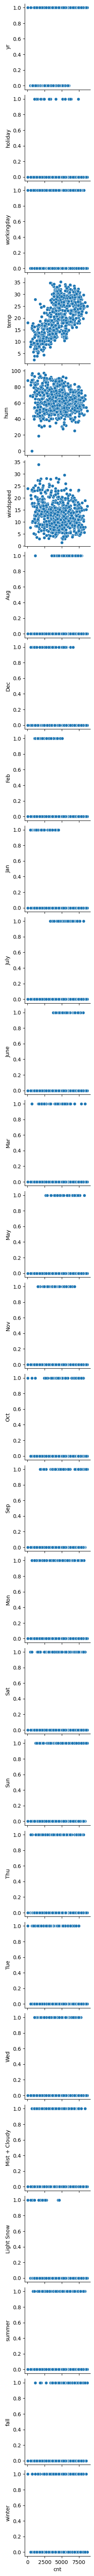

<Figure size 1600x1200 with 0 Axes>

In [115]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(df, y_vars=X_train.columns, x_vars='cnt')
plt.figure(figsize=(16, 12))
plt.show()


In [76]:
residuals = y_train - y_train_pred
residuals 

576    0.116360
426   -0.154780
728   -0.216497
482   -0.197386
111   -0.198771
         ...   
578    0.002949
53    -0.073782
350    0.094189
79    -0.119141
520    0.161985
Length: 510, dtype: float64

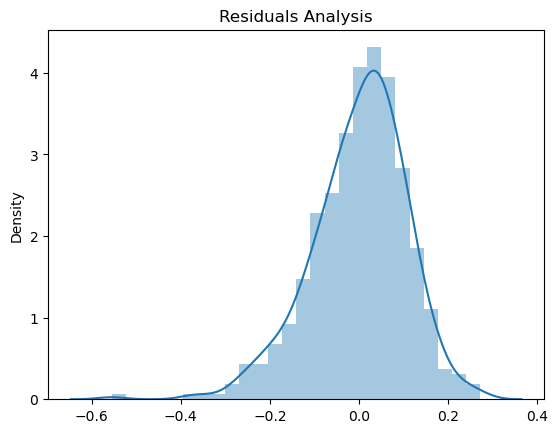

In [77]:
#Plotting the residuals 

sns.distplot(residuals)
plt.title("Residuals Analysis")
plt.show()

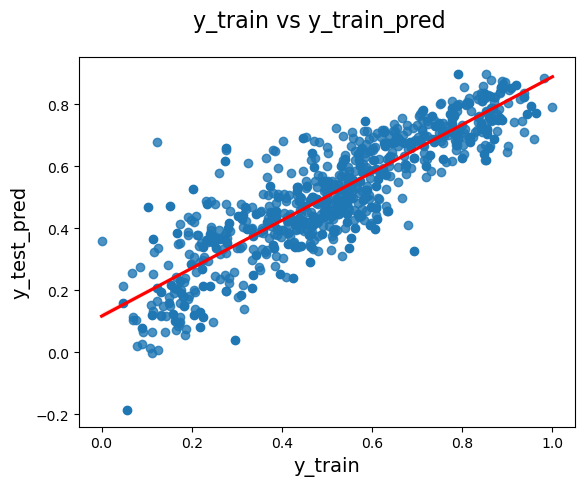

In [109]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_train, y=y_train_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 16)               
plt.xlabel('y_train', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 14) 
plt.show()

In [78]:
#Prediction and Evalution of test set 

#Rescaling the num variables for test set 

#creating a list of num variables 
num_vars = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Mist + Cloudy', 'Light Snow',
       'summer', 'fall', 'winter']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter
184,0.0,1.0,0.0,0.831783,0.657364,0.084219,0.692706,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
535,1.0,0.0,1.0,0.901354,0.610133,0.153728,0.712034,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
299,0.0,0.0,0.0,0.511964,0.837699,0.334206,0.303382,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
221,0.0,0.0,1.0,0.881625,0.437098,0.339570,0.547400,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152,0.0,0.0,0.0,0.817246,0.314298,0.537414,0.569029,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273,0.263636,0.245455,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248,0.441609,0.431338,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
#Creating X and y test 

y_test = df_test.pop("cnt")
X_test = df_test 

In [101]:
#adding a constant 

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Mist + Cloudy,Light Snow,summer,fall,winter
184,1.0,0.0,1.0,0.0,0.831783,0.657364,0.084219,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
535,1.0,1.0,0.0,1.0,0.901354,0.610133,0.153728,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
299,1.0,0.0,0.0,0.0,0.511964,0.837699,0.334206,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
221,1.0,0.0,0.0,1.0,0.881625,0.437098,0.339570,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152,1.0,0.0,0.0,0.0,0.817246,0.314298,0.537414,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [103]:
#Removing irrelevant cols 

X_test_sm = X_test_sm.drop(["Mar" , "workingday" , "Oct" , "fall" , "July" , "Sat" , "Thu" , "Sun" , "June" , "Wed" , "May" , "hum" , "temp" ] , axis=1)

In [104]:
print(len(X_test_sm.columns))

16


In [105]:
#making predictions
y_pred = lr_model.predict(X_test_sm)

In [106]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.7306796973134476


In [107]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.7728023809083795


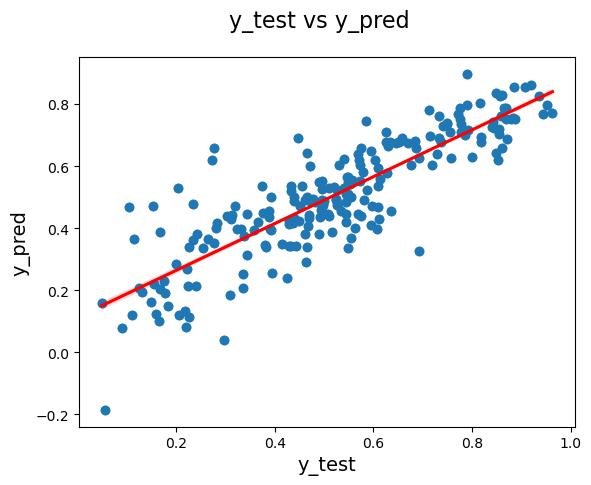

In [108]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()